In [21]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [4]:
max_features = 10000
max_len = 500

In [5]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [11]:
print(x_train.shape)
print(x_train[23])

(25000, 500)
[  65    9   82  283    8  113   48   64   12   16 1391    6  117  128
   13  421   15    4   53 2428  537   11   14    2 8734   71  579   39
    4  915  213    7  650   63    9  478   21   12  961  180    4  921
    2    7  134  537   88    4  668  105    2    2    5    2    2   11
  843   28   32    4 1137    7    6  320 1061 4548    2  286   14   22
  424    8   30   44    2  275    2  150    4  156  308 5022  131  738
    8  850  116  137    2    2    9    2    5 3308   17  126 6301 4029
  214    6  217  398   43   18   90   21  518    2    4 3262    7   27
  109  237   59  161   79    6    2  109    8 1975    2    2 1077   41
 1220 1826    5 1249  116  405    8 1108   56   18   12    2    2    9
  478  466  170    6    2  120    4  350   11    6  171  139    2    2
   47  164   76    8   81   21   59  127 3027  178   15  442    4  172
  250   37  770  178   19   41    2  239   11    2 7767  497    8   97
   56   18   15  666 1323  446    2    2    5 2880    8    6 105

In [14]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=RMSprop(lr=1e-4),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [17]:
history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.7290 - acc: 0.5259 - val_loss: 0.6841 - val_acc: 0.5768
Epoch 2/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6636 - acc: 0.6792 - val_loss: 0.6660 - val_acc: 0.6044
Epoch 3/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6189 - acc: 0.7758 - val_loss: 0.6082 - val_acc: 0.7468
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.5237 - acc: 0.8173 - val_loss: 0.4883 - val_acc: 0.8014
Epoch 5/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.4042 - acc: 0.8505 - val_loss: 0.4163 - val_acc: 0.8316
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.3387 - acc: 0.8688 - val_loss: 0.4265 - val_acc: 0.8246
Epoch 7/10
20000/20000 [==============================] - 6s 309us/step - loss: 0.2960 - acc: 0.8674 - val_loss: 0.3904 - val_acc

In [19]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [20]:
epochs = range(1,len(acc) + 1)

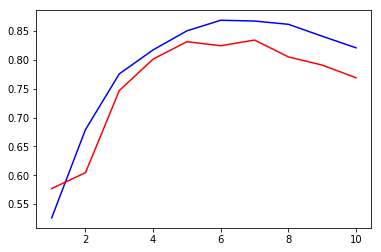

In [24]:
plt.plot(epochs, acc,'b')
plt.plot(epochs, val_acc,'r')

In [29]:
print(type(x_train))
print(len(x_train))

<class 'numpy.ndarray'>
25000
